# **Data Cleaning**

## Objectives

* Remove invalid data.
* Check for missing data.

## Inputs

* Output file from DataCollection notebook: "outputs/datasets/collection/HousePrices.csv"

## Outputs

* TBU

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Running the notebook
#### Allways run: Change working directory
#### If a new session: Load collected data: Install pandas -> Restart kernel -> Import pandas -> Data exploration: load variables -> Profile report: Install ydata profiling & ipywidgets -> Import profile report -> Correlation and predictive analysis:  Run pandas report test function.

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
!pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 8.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 114.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 124.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 154.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing2/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing2'

---

# Load collected data

In [11]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


### Summary - detailed study of missing data variables

(Missing share of data within paranthesis):
- EnclosedPorch - (90.68%) and WoodDeckSF - (89.38%): Given their significant data deficiency, it is likely that these variables will be excluded in a later stage. Conducting a correlation study on such limited data could potentially yield misleading results.
- LotFrontage (17.74%): The analysis reveals a skewness level of 2.16 and notably, a kurtosis value of 17.45 indicating heavy-tailedness in the distribution. With the mean (70.05) and median (69) in close proximity and a standard deviation of 24, the distribution appears non-normal. Due to this non-normality and the significant disparity between the mean and median, a median imputation is deemed suitable. This approach mitigates the influence of potential outliers and preserves the integrity of the distribution, ensuring more robust estimates in subsequent analyses.
- GarageFinish (16.10%): The garage finish is classified into three categories: Finished (Fin), Rough Finished (Rfn), and Unfinished (Unf), with Unfinished comprising the majority (44.6%). However, the distribution within the missing data remains unknown. Given that the existing dataset predominantly labels finishes as "Unfinished," we can use this as an initial value for future calculations. However, if a significant correlation emerges in the initial study, further analysis will be necessary to accurately impute the missing data.
- BsmtFinType1 (9.93%): Given the similarities with the previous GarageFinish variables, we can apply the same methodology to analyze this input. Utilizing the "Unfinished" type as the basis for the initial evaluation is a logical approach.
- BedroomAbvGr (6.78%): The distribution of values shows no signs of abnormality, with a median of 3 and a mean of 2.87, along with a standard deviation of 0.82, coupled with low skewness and kurtosis values. Imputing using the median value should be suitable in this case.
- 2ndFlrSF (5.89%): Considering that a considerable portion of the variable (53.5%) contains zeros, we can reasonably infer the absence of a second floor in these cases. Therefore, we will impute '0' for the missing data, indicating the absence of a second floor in our calculations.
- GarageYrBlt (5.55%): The kurtosis and skewness both indicate a negative value, suggesting a flat distribution. At present, there is no discernible value to utilize. Thus, a secondary analysis is necessary to determine an appropriate value for conducting correlation studies.
- BsmtExposure (2.60%): Given that the majority of basement exposure variables are designated as 'no' (67%), we can initially assign a value of '0' to represent this option. However, if strong correlations emerge for other categories, we must incorporate this information into our evaluation and prediction of other objects.
- MasVnrArea (0.55%): gSince the majority of values are zero, suggesting the absence of masonry veneer area at the property, we can infer the same for missing values and impute them with zeros.

In [1]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/HousePrices.csv")
df.head(5)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   
3       961       NaN           NaN           No         216          ALQ   
4      1145       NaN           4.0           Av         655          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
0        150            0.0         548          RFn  ...         65.0   
1        284            NaN         460          RFn  ...         80.0   
2        434            0.0         608          RFn  ...         68.0   
3        540            NaN         642          Unf  ...         60.0   
4        490            0.0         836          RFn  ...         84.0   

   MasVnrArea OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  WoodDeckSF  \
0       196.0          61            5            7          856         0.0   
1         0.0           0            8            6         1262         NaN   
2       162.0          42            5            7          920         NaN   
3         0.0          35            5            7          756         NaN   
4       350.0          84            5            8         1145         NaN   

   YearBuilt  YearRemodAdd  SalePrice  
0       2003          2003     208500  
1       1976          1976     181500  
2       2001          2002     223500  
3       1915          1970     140000  
4       2000          2000     250000  

[5 rows x 24 columns]

---

# Data exploration

In this section, we will investigate the data types and assess whether the variables contain any missing, erroneous, or inconsistent data

## Data types

From the DataCollection notebook we know that we have the following distribution of variables and types: Float64(7), Int64(13), Object(4).
We would like firstly which has missing data and also whether any field is filled with a "placeholder" e.g zeros or similar, furthermore we need to check the details for the object types to check the catogorisation of the variables.

1. Check variables with missing data.

In [2]:
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
vars_with_missing_data

['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtExposure',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

In [3]:
df[vars_with_missing_data].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   2ndFlrSF       1374 non-null   float64
 1   BedroomAbvGr   1361 non-null   float64
 2   BsmtExposure   1422 non-null   object 
 3   BsmtFinType1   1315 non-null   object 
 4   EnclosedPorch  136 non-null    float64
 5   GarageFinish   1225 non-null   object 
 6   GarageYrBlt    1379 non-null   float64
 7   LotFrontage    1201 non-null   float64
 8   MasVnrArea     1452 non-null   float64
 9   WoodDeckSF     155 non-null    float64
dtypes: float64(7), object(3)
memory usage: 114.2+ KB


### Profile report

- We generate pandas profiling (ydata) report for each variable with missing values.
   - We install y-data profiling
   - We import y-data_profiling library and generate a profile report.

In [5]:
%pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 90.0 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 152.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 115.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.3/409.3 kB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 171.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 54.2 MB/s et

In [6]:
pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 99.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


2. Generate detailed report for variables.

In [4]:
# Code from walkthrough project 02, data cleaning notebook
from ydata_profiling import ProfileReport
if vars_with_missing_data:
    profile = ProfileReport(df=df[vars_with_missing_data], minimal=True)
    profile.to_notebook_iframe()
else:
    print("There are no variables with missing data")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

3. Generate summary for missing data.

In [5]:
def EvaluateMissingData(df):
  """
  Function to evaluate data with missing values
  """
  missing_data_absolute = df.isnull().sum()
  missing_data_percentage = round(missing_data_absolute/len(df)*100 , 2)
  df_missing_data = (pd.DataFrame(
                          data= {"RowsWithMissingData": missing_data_absolute,
                                 "PercentageOfDataset": missing_data_percentage,
                                 "DataType":df.dtypes}
                                  )
                    .sort_values(by=['PercentageOfDataset'],ascending=False)
                    .query("PercentageOfDataset > 0")
                    )

  return df_missing_data

In [6]:
EvaluateMissingData(df)

RowsWithMissingData  PercentageOfDataset DataType
EnclosedPorch                 1324                90.68  float64
WoodDeckSF                    1305                89.38  float64
LotFrontage                    259                17.74  float64
GarageFinish                   235                16.10   object
BsmtFinType1                   145                 9.93   object
BedroomAbvGr                    99                 6.78  float64
2ndFlrSF                        86                 5.89  float64
GarageYrBlt                     81                 5.55  float64
BsmtExposure                    38                 2.60   object
MasVnrArea                       8                 0.55  float64

4. Summarize the variables starting with "0."

In [7]:
for column in df.columns:
    # Check if all values in the column are integers
    if not df[column].apply(lambda x: isinstance(x, int)).all():
        non_integer_values = df[column][~df[column].apply(lambda x: isinstance(x, int))]
        unique_non_integer_values = non_integer_values[~non_integer_values.apply(lambda x: isinstance(x, float) and not str(x).startswith('0.'))].unique()
        print(f"Unique non-integer values in {column}: {unique_non_integer_values}")

Unique non-integer values in 2ndFlrSF: [0.]
Unique non-integer values in BedroomAbvGr: [0.]
Unique non-integer values in BsmtExposure: ['No' 'Gd' 'Mn' 'Av']
Unique non-integer values in BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'LwQ']
Unique non-integer values in EnclosedPorch: [0.]
Unique non-integer values in GarageFinish: ['RFn' 'Unf' 'Fin']
Unique non-integer values in GarageYrBlt: []
Unique non-integer values in KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']
Unique non-integer values in LotFrontage: []
Unique non-integer values in MasVnrArea: [0.]
Unique non-integer values in WoodDeckSF: [0.]


In [8]:
for column in df.columns:
    # Check if all values in the column are integers
    if not df[column].apply(lambda x: isinstance(x, int)).all():
        non_integer_values = df[column][~df[column].apply(lambda x: isinstance(x, int))]
        unique_non_integer_values = non_integer_values[~non_integer_values.apply(lambda x: isinstance(x, float) and not str(x).startswith('0.'))].unique()
        zero_count = non_integer_values[non_integer_values == 0.].count()
        print(f"Unique non-integer values in {column}: {unique_non_integer_values}")
        print(f"Count of '0.' in {column}: {zero_count}")

Unique non-integer values in 2ndFlrSF: [0.]
Count of '0.' in 2ndFlrSF: 781
Unique non-integer values in BedroomAbvGr: [0.]
Count of '0.' in BedroomAbvGr: 6
Unique non-integer values in BsmtExposure: ['No' 'Gd' 'Mn' 'Av']
Count of '0.' in BsmtExposure: 0
Unique non-integer values in BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'LwQ']
Count of '0.' in BsmtFinType1: 0
Unique non-integer values in EnclosedPorch: [0.]
Count of '0.' in EnclosedPorch: 116
Unique non-integer values in GarageFinish: ['RFn' 'Unf' 'Fin']
Count of '0.' in GarageFinish: 0
Unique non-integer values in GarageYrBlt: []
Count of '0.' in GarageYrBlt: 0
Unique non-integer values in KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']
Count of '0.' in KitchenQual: 0
Unique non-integer values in LotFrontage: []
Count of '0.' in LotFrontage: 0
Unique non-integer values in MasVnrArea: [0.]
Count of '0.' in MasVnrArea: 861
Unique non-integer values in WoodDeckSF: [0.]
Count of '0.' in WoodDeckSF: 78


### Summary - detailed study of missing data variables

"The following variables contain values starting with '0.': BedroomAbvGr, EnclosedPorch, MasVnrArea, and WoodDeckSf. For EnclosedPorch and WoodDeckSF, we have already concluded that there are too many missing values to evaluate; hence, no further investigation into the 'zeros' is needed at this stage. Regarding BedroomAbvGr and MasVnrArea, we can conclude the following:

BedroomAbvGr: The data profiling indicates 6 occurrences of 'zeros', which matches the count of '0.' occurrences in the variable. Therefore, we can consider '0.' as zero (0).

MasVnrArea: We have 861 values with '0.', and since all values (except for the small share of missing data) are floats, we can consider '0.' as zero (0)."

## Handling categorical variables

The following variables are categorical: Garage Finish, BsFinType and BsmtExposure
In order to ensure the correct imputation method can be implemented for the missing data in case one of the variable have a significant effect for the sale price.





In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

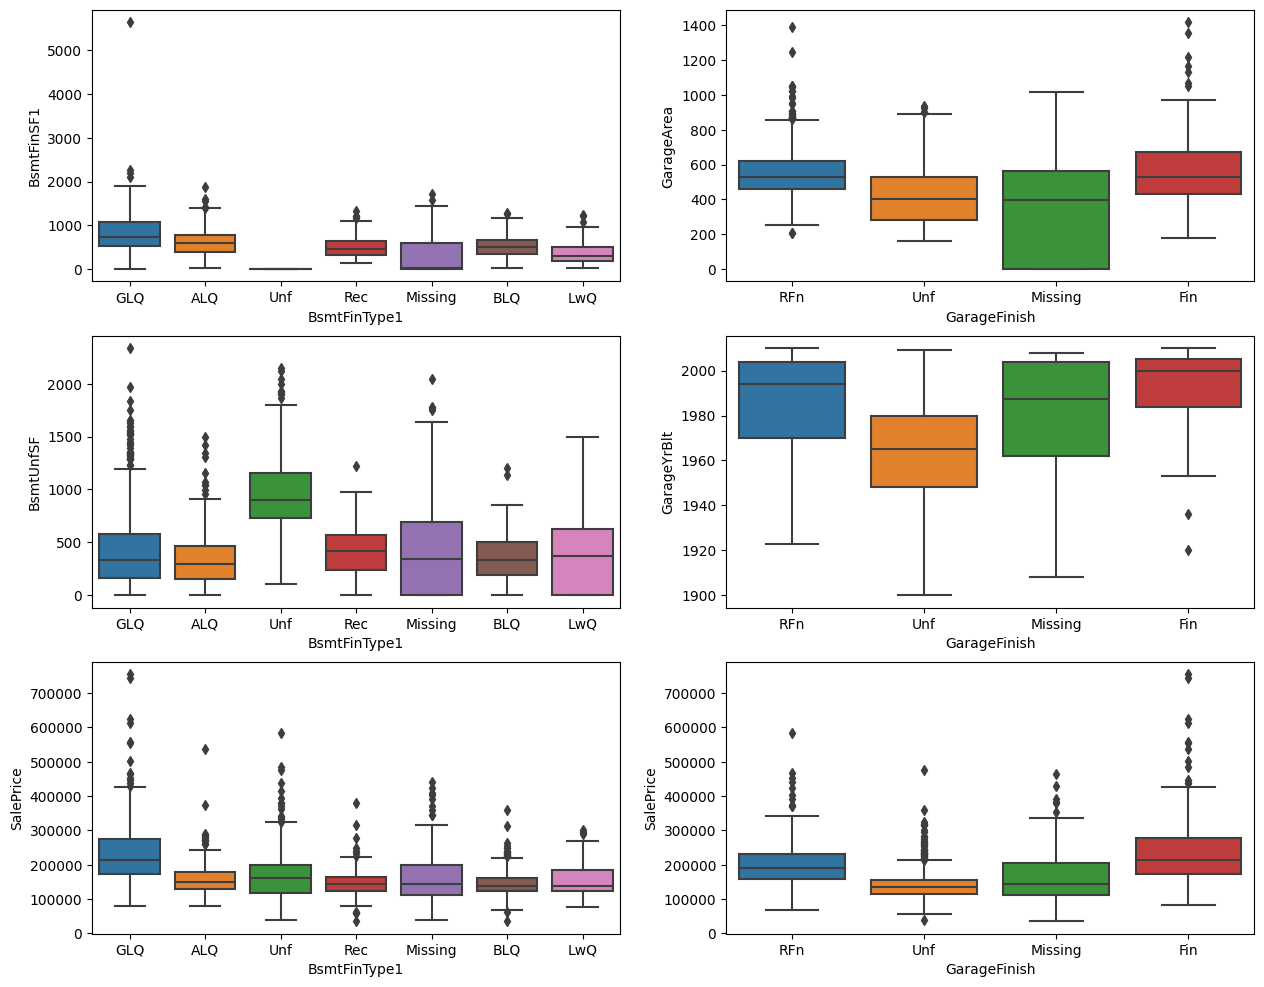

In [10]:
df_missing = df.copy()
df_missing['BsmtFinType1']=df_missing['BsmtFinType1'].fillna('Missing')
df_missing['GarageFinish']=df_missing['GarageFinish'].fillna('Missing')

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,12))
sns.boxplot(data=df_missing, x='BsmtFinType1', y='BsmtFinSF1', ax=axes[0,0])
sns.boxplot(data=df_missing, x='BsmtFinType1', y='BsmtUnfSF', ax=axes[1,0])
sns.boxplot(data=df_missing, x='BsmtFinType1', y='SalePrice', ax=axes[2,0])

sns.boxplot(data=df_missing, x='GarageFinish', y='GarageArea', ax=axes[0,1])
sns.boxplot(data=df_missing, x='GarageFinish', y='GarageYrBlt', ax=axes[1,1])
sns.boxplot(data=df_missing, x='GarageFinish', y='SalePrice', ax=axes[2,1])

In [12]:
pip install altair

Note: you may need to restart the kernel to use updated packages.


In [13]:
import altair as alt

chart = alt.Chart(df_missing).mark_boxplot().encode(
    y='SalePrice',
).properties(
    width=600  # Adjust the width of the chart as needed
)

# Layering two box plots for 'GarageFinish' and 'BsmtFinType1' on the x-axis
chart_layered = chart.encode(x='GarageFinish') + chart.encode(x='BsmtFinType1')

chart_layered.show()

ValueError: show() method requires the altair_viewer package. See http://github.com/altair-viz/altair_viewer

In [14]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [15]:
import plotly.express as px
fig = px.box(df_missing, x='BsmtFinType1', y='SalePrice')
fig.show()

<AxesSubplot:>

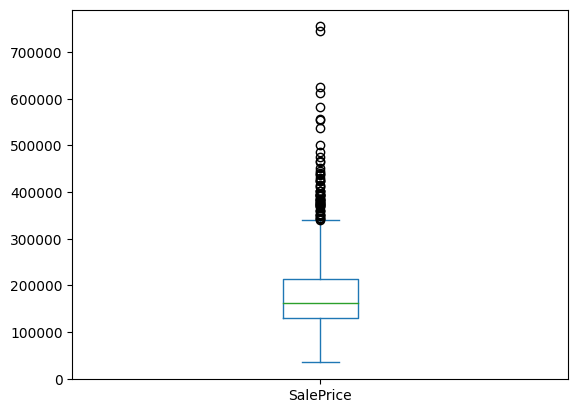

In [16]:
df.plot(kind='box', x='BsmtFinType1', y='SalePrice')

There is no clear connection between BsmtFinType and sales price. Since low-quality and average recreation rooms are essentially the same, the finish type has little effect. What can be discerned is that the quality of living quarters is influencing the price; however, this is most likely due to location rather than the finish type.

In [16]:
import plotly.express as px
fig = px.box(df_missing, x='GarageFinish', y='SalePrice')
fig.show()

The sales price tends to increase with newer garages; however, this trend is likely influenced by property characteristics. Outliers were detected between 1993 and 1996, but subsequently, sales prices reverted to lower levels.

In [17]:
import plotly.express as px
fig = px.box(df_missing, x='GarageYrBlt', y='SalePrice')
fig.show()

# Correlation and predictive power score analysis

We will perform a correlation and predictive analysis for the existing raw data. The functions used are from CI predictive analysis second walkthrough project.

Test code for checking pandas behaviour

In [18]:
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

We use CalculateCorrAndPPS function to calculate Correlations and Predictive Power Score.

In [20]:
# Assuming df is your DataFrame
# Check for columns containing the value 'No'
columns_with_no_value = df.columns[df.isin(['No']).any()].tolist()

print("Columns with 'No' value:", columns_with_no_value)

Columns with 'No' value: ['BsmtExposure']


In [21]:
import pandas as pd

def custom_to_numeric(value):
    try:
        return float(value)
    except ValueError:
        if value == 'GLQ':  # Example: Replace 'GLQ' with 0
            return 0
        else:
            return float('nan')

def CalculateCorrAndPPS(df):
    # Apply custom conversion function to each element in the DataFrame
    df_numeric = df.applymap(custom_to_numeric)
    
    # Calculate Pearson correlation
    df_corr_pearson = df_numeric.corr(method="pearson")
    
    # Calculate Spearman correlation
    df_corr_spearman = df_numeric.corr(method="spearman")
    
    # Calculate Predictive Power Score (PPS)
    # pps_matrix_raw = pps.matrix(df_numeric)
    
    return df_corr_pearson, df_corr_spearman#, pps_matrix_raw

# Call the function with the DataFrame 'df'
df_corr_pearson, df_corr_spearman = CalculateCorrAndPPS(df)

In [22]:
def CalculateCorrAndPPS(df):
    df_numeric = df.applymap(custom_to_numeric)
    df_corr_pearson = df_numeric.corr(method="pearson")
    df_corr_spearman = df_numeric.corr(method="spearman")
    pps_matrix_raw = pps.matrix(df_numeric)
    return df_corr_pearson, df_corr_spearman, pps_matrix_raw

In [23]:
import numpy as np

In [29]:
pip install pandas==1.4.2

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install ppscore

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd

# Assuming df is your original DataFrame
df_numeric = df.select_dtypes(include=['number'])

In [25]:
print(df.dtypes)

1stFlrSF           int64
2ndFlrSF         float64
BedroomAbvGr     float64
BsmtExposure      object
BsmtFinSF1         int64
BsmtFinType1      object
BsmtUnfSF          int64
EnclosedPorch    float64
GarageArea         int64
GarageFinish      object
GarageYrBlt      float64
GrLivArea          int64
KitchenQual       object
LotArea            int64
LotFrontage      float64
MasVnrArea       float64
OpenPorchSF        int64
OverallCond        int64
OverallQual        int64
TotalBsmtSF        int64
WoodDeckSF       float64
YearBuilt          int64
YearRemodAdd       int64
SalePrice          int64
dtype: object


In [26]:
print(df['BsmtExposure'].unique())
print(df['BsmtFinType1'].unique())
print(df['GarageFinish'].unique())
print(df['KitchenQual'].unique())


['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' nan 'BLQ' 'LwQ']
['RFn' 'Unf' nan 'Fin']
['Gd' 'TA' 'Ex' 'Fa']


In [27]:
bsmt_exposure_mapping = {'No': 0, 'Mn': 1, 'Av': 2, 'Gd': 3}
bsmt_fin_type_mapping = {'Unf': 0, 'LwQ': 1, 'Rec': 2, 'BLQ': 3, 'ALQ': 4, 'GLQ': 5}
garage_finish_mapping = {'Unf': 0, 'RFn': 1, 'Fin': 2}
kitchen_qual_mapping = {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}

# Apply label encoding using the mappings
df['BsmtExposure_encoded'] = df['BsmtExposure'].map(bsmt_exposure_mapping)
df['BsmtFinType1_encoded'] = df['BsmtFinType1'].map(bsmt_fin_type_mapping)
df['GarageFinish_encoded'] = df['GarageFinish'].map(garage_finish_mapping)
df['KitchenQual_encoded'] = df['KitchenQual'].map(kitchen_qual_mapping)

In [28]:
# Check for non-numeric values in df_corr_pearson
for column in df_corr_pearson.columns:
    non_numeric_values = df_corr_pearson[~df_corr_pearson[column].apply(lambda x: isinstance(x, (int, float)))][column]
    if not non_numeric_values.empty:
        print(f"Column '{column}' in df_corr_pearson contains non-numeric values:")
        print(non_numeric_values)

# Check for non-numeric values in df_corr_spearman
for column in df_corr_spearman.columns:
    non_numeric_values = df_corr_spearman[~df_corr_spearman[column].apply(lambda x: isinstance(x, (int, float)))][column]
    if not non_numeric_values.empty:
        print(f"Column '{column}' in df_corr_spearman contains non-numeric values:")
        print(non_numeric_values)

In [29]:
print(pps_matrix_raw)

NameError: name 'pps_matrix_raw' is not defined



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



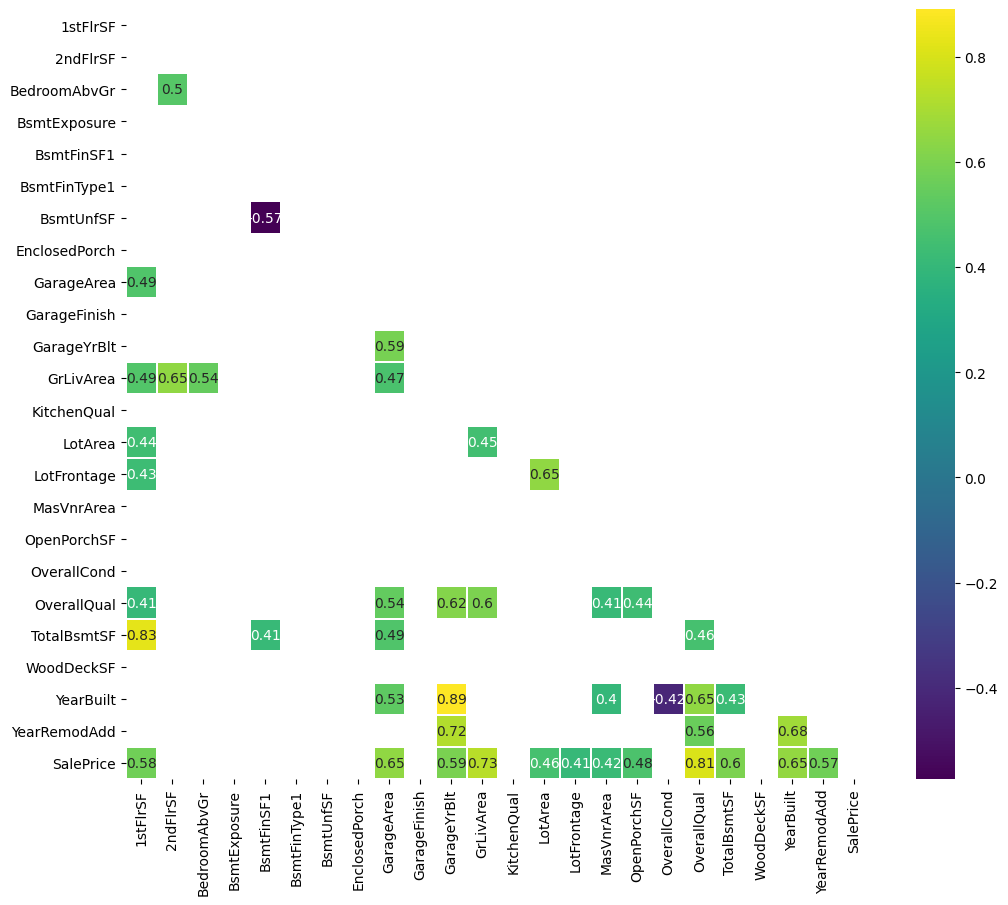



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



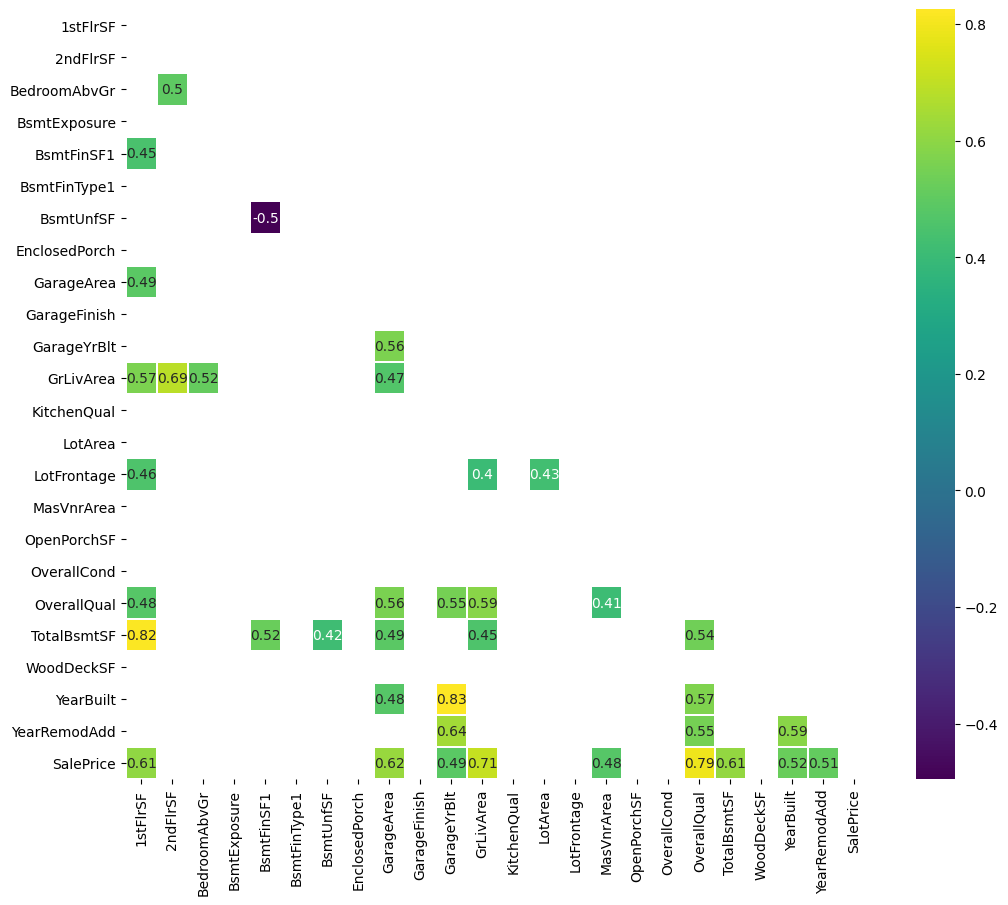



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



TypeError: bad operand type for abs(): 'str'

In [30]:
import ppscore as pps  # Import the ppscore library
# Calculate the PPS matrix separately
pps_matrix_raw = pps.matrix(df_numeric)

# Call the DisplayCorrAndPPS function with all arguments including the PPS matrix
DisplayCorrAndPPS(df_corr_pearson=df_corr_pearson,
                  df_corr_spearman=df_corr_spearman,
                  pps_matrix=pps_matrix_raw,  # Pass the calculated PPS matrix here
                  CorrThreshold=0.4, 
                  PPS_Threshold=0.2,
                  figsize=(12, 10), 
                  font_annot=10)

# Summary
From the functions checking variables with missing data and the profile report we can see the we have missing data and "zeros" in the dataset, the data has three variables with type object.

# Data cleaning

In the first section we will clean the data, dropping variables where feasible and imputing values in order to normalize data.
In the second section we will assess the effect of cleaning the data.

1. Drop variables.
-  
2. Median imputation
   For 

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

In [31]:
pip install feature-engine

Note: you may need to restart the kernel to use updated packages.


In [32]:
from feature_engine.selection import DropFeatures

variables_method = ['EnclosedPorch', 'WoodDeckSF']
variables_method

imputer = DropFeatures(features_to_drop=variables_method)
df_method = imputer.fit_transform(df)
df_method.head(5)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   
3       961       NaN           NaN           No         216          ALQ   
4      1145       NaN           4.0           Av         655          GLQ   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  OverallCond  \
0        150         548          RFn       2003.0  ...            5   
1        284         460          RFn       1976.0  ...            8   
2        434         608          RFn       2001.0  ...            5   
3        540         642          Unf       1998.0  ...            5   
4        490         836          RFn       2000.0  ...            5   

  OverallQual  TotalBsmtSF  YearBuilt  YearRemodAdd  SalePrice  \
0           7          856       2003          2003     208500   
1           6         1262       1976          1976     181500   
2           7          920       2001          2002     223500   
3           7          756       1915          1970     140000   
4           8         1145       2000          2000     250000   

   BsmtExposure_encoded  BsmtFinType1_encoded  GarageFinish_encoded  \
0                   0.0                   5.0                   1.0   
1                   3.0                   4.0                   1.0   
2                   1.0                   5.0                   1.0   
3                   0.0                   4.0                   0.0   
4                   2.0                   5.0                   1.0   

   KitchenQual_encoded  
0                    3  
1                    2  
2                    3  
3                    3  
4                    3  

[5 rows x 26 columns]

## Categorical imputation


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['GarageFinish', 'BsmtFinType1'] 




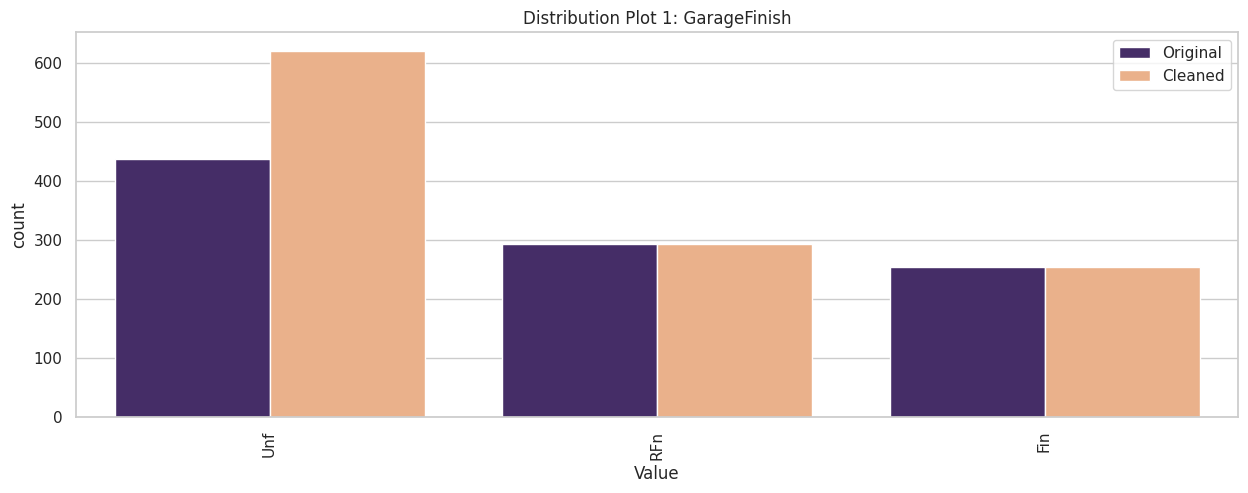

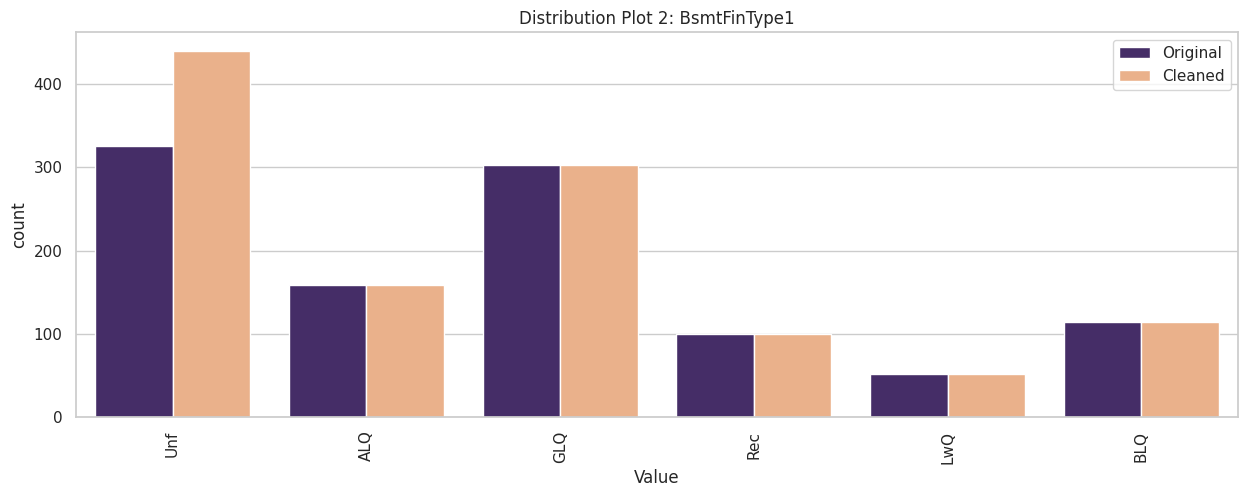

In [39]:
from feature_engine.imputation import CategoricalImputer

variables_categorical = ['GarageFinish' , 'BsmtFinType1']
imputer = CategoricalImputer(imputation_method='missing', fill_value='Unf', variables=variables_categorical)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_categorical)


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['LotFrontage', 'BedroomAbvGr'] 




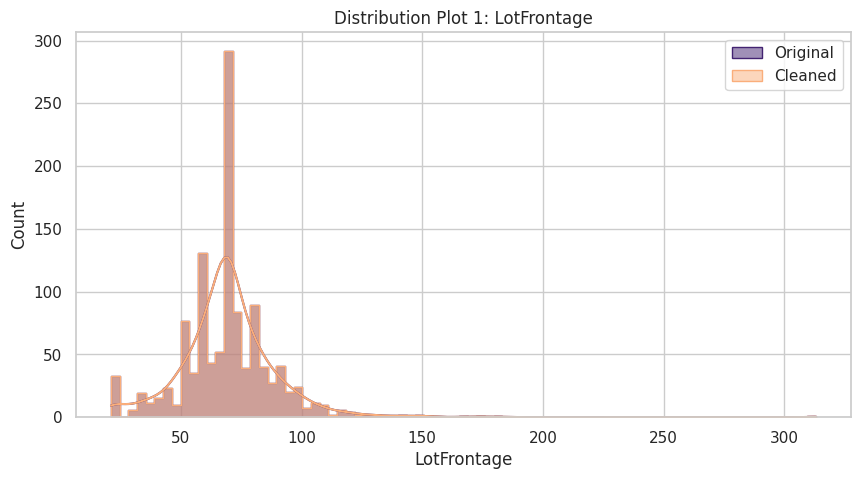

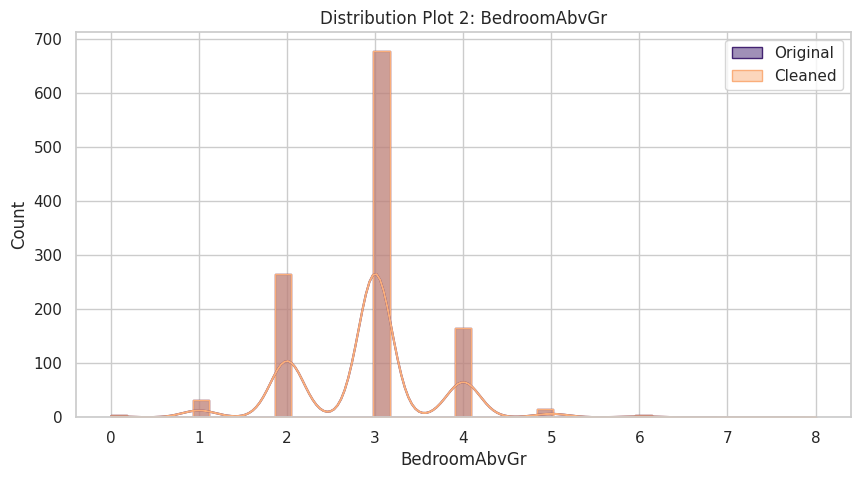

In [40]:
from feature_engine.imputation import MeanMedianImputer

variables_mean = ['LotFrontage' , 'BedroomAbvGr']
imputer = MeanMedianImputer(imputation_method='mean', variables=variables_mean)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_mean)


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['2ndFlrSF', 'GarageYrBlt', 'MasVnrArea'] 




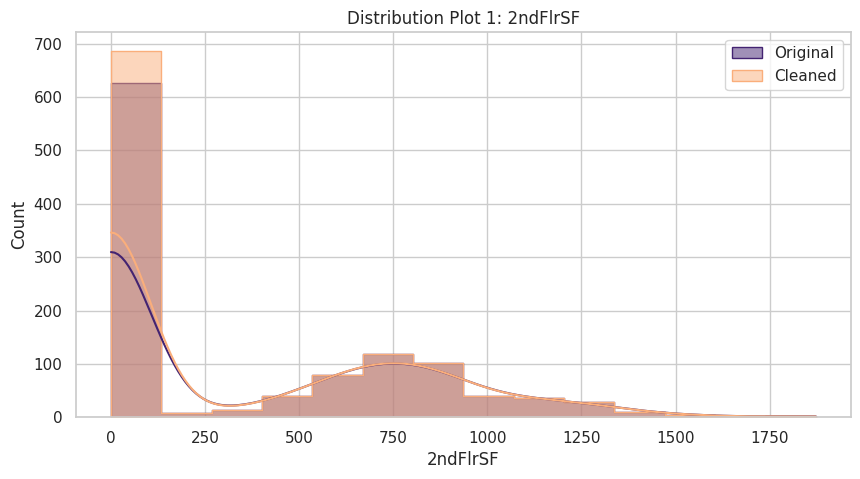

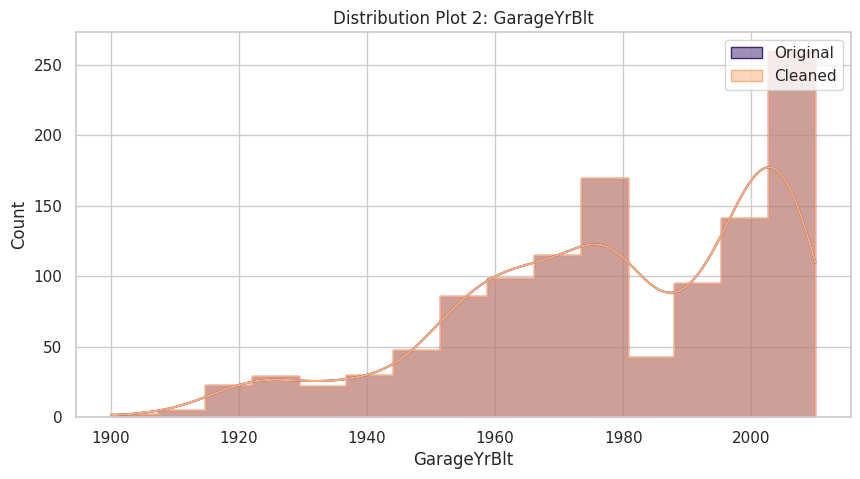

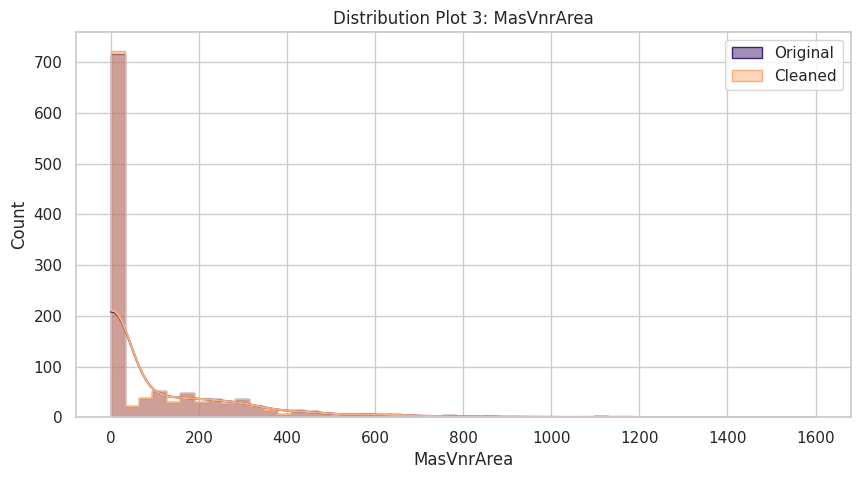

In [41]:
variables_median = ['2ndFlrSF' , 'GarageYrBlt', 'MasVnrArea']
imputer = MeanMedianImputer(imputation_method='median', variables=variables_median)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_median)

In [42]:
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

def DataCleaningEffect(df_original,df_cleaned,variables_applied_with_method):
  """
  Function to visualize data cleaning effect
  """
  flag_count=1 # Indicate plot number
  
  # distinguish between numerical and categorical variables
  categorical_variables = df_original.select_dtypes(exclude=['number']).columns 

  # scan over variables, 
    # first on variables that you applied the method
    # if the variable is a numerical plot, a histogram if categorical plot a barplot
  for set_of_variables in [variables_applied_with_method]:
    print("\n=====================================================================================")
    print(f"* Distribution Effect Analysis After Data Cleaning Method in the following variables:")
    print(f"{set_of_variables} \n\n")
  

    for var in set_of_variables:
      if var in categorical_variables:  # it is categorical variable: barplot
        
        df1 = pd.DataFrame({"Type":"Original","Value":df_original[var]})
        df2 = pd.DataFrame({"Type":"Cleaned","Value":df_cleaned[var]})
        dfAux = pd.concat([df1, df2], axis=0)
        fig , axes = plt.subplots(figsize=(15, 5))
        sns.countplot(hue='Type', data=dfAux, x="Value",palette=['#432371',"#FAAE7B"])
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.xticks(rotation=90)
        plt.legend() 

      else: # it is numerical variable: histogram

        fig , axes = plt.subplots(figsize=(10, 5))
        sns.histplot(data=df_original, x=var, color="#432371", label='Original', kde=True,element="step", ax=axes)
        sns.histplot(data=df_cleaned, x=var, color="#FAAE7B", label='Cleaned', kde=True,element="step", ax=axes)
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.legend() 

      plt.show()
      flag_count+= 1

In [43]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['SalePrice'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1168, 28) 
TestSet shape: (292, 28)


In [44]:
# Drop Variables ['EnclosedPorch', 'WoodDeckSF']
variables_method = ['EnclosedPorch', 'WoodDeckSF']
imputer = DropFeatures(features_to_drop=variables_method)
imputer.fit(TrainSet)
TrainSet, TestSet = imputer.transform(TrainSet), imputer.transform(TestSet)

# MeanMedianImputer
variables_method = ['BedroomAbvGr', 'GarageYrBlt', 'LotFrontage']
imputer = MeanMedianImputer(imputation_method='median', variables=variables_method)
imputer.fit(TrainSet)
TrainSet, TestSet = imputer.transform(TrainSet) , imputer.transform(TestSet)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
